In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import numpy as np
from rana import rana_func, Rosenbrock
import importlib
mpl.rcParams['figure.dpi'] = 300

In [3]:
import random_search
importlib.reload(random_search)
run_with_multiple_seeds = random_search.run_with_multiple_seeds

In [4]:
from grid_search import grid_search
from random_search import run_with_multiple_seeds

# Random Search

In [16]:
random_search_results = []
for dim in range(1,10+1):
    mean_objective, std_objective, mean_runtime = run_with_multiple_seeds(dim, rana_func, n_runs=10)
    random_search_results.append([dim, mean_objective])
    print(dim, mean_objective,std_objective, mean_runtime)
random_search_results = np.array(random_search_results)

1 0.0 0.0 0.2967719554901123
2 -491.46726962034256 6.455337927530957 0.2920885801315308
3 -913.0925936379348 31.596047771646155 0.2931721925735474
4 -1248.4281857476285 55.87373877014884 0.27805509567260744
5 -1570.4499028523965 132.6469715454864 0.2858682632446289
6 -1719.1615258919167 114.09046713305639 0.27800352573394777
7 -1858.0445505576347 120.71263427475063 0.2768450975418091
8 -2013.57329942985 169.49902522452925 0.2795057773590088
9 -2118.4263552195484 149.3711831079818 0.2882590055465698
10 -2338.01091164929 235.2046466054446 0.2901393175125122


In [26]:
random_search_results_ROS = []
for dim in range(1,10+1):
    mean_objective = run_with_multiple_seeds(dim, Rosenbrock, n_runs=10)
    random_search_results_ROS.append([dim, mean_objective])
    print(dim, mean_objective)
random_search_results_ROS = np.array(random_search_results_ROS)

1 0.0
2 410.65799882733415
3 577033.12197786
4 35909476.197877705
5 701273782.0074813
6 5825362475.321887
7 22340403344.2694
8 57680574084.49656
9 110440640273.17593
10 217858161787.5656


# Grid search 

In [6]:
grid_search_results = []
for dim in range(1,10+1):
    grid_searcher = grid_search(dim, [-500, 500], rana_func)
    min_objective, min_X = grid_searcher.run()
    grid_search_results.append([dim, min_objective, min_X])
    print(grid_search_results[-1])
grid_search_results = np.array(grid_search_results)

[1, 0.0, array([-500.])]
[2, -500.75318247372104, array([-479.7979798,  500.       ])]
[3, -1000.5672004571803, array([-300.,  500.,  300.])]
[4, -1392.821783107174, array([-500., -500., -500., -500.])]
[5, -1857.0957108095654, array([-500., -500., -500., -500., -500.])]
[6, -2321.3696385119565, array([-500., -500., -500., -500., -500., -500.])]
[7, -2785.6435662143476, array([-500., -500., -500., -500., -500., -500., -500.])]
[8, -3249.9174939167387, array([-500., -500., -500., -500., -500., -500., -500., -500.])]
[9, -3714.191421619131, array([-500., -500., -500., -500., -500., -500., -500., -500., -500.])]
[10, -4178.465349321522, array([-500., -500., -500., -500., -500., -500., -500., -500., -500.,
       -500.])]


<ipython-input-6-9dfee1d841a8>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  grid_search_results = np.array(grid_search_results)


In [24]:
grid_search_results_ROS = []
for dim in range(1,10+1):
    grid_searcher = grid_search(dim, [-500, 500], Rosenbrock)
    min_objective, min_X = grid_searcher.run()
    grid_search_results_ROS.append([dim, min_objective, min_X])
    print(grid_search_results_ROS[-1])
grid_search_results_ROS = np.array(grid_search_results_ROS)

[1, 0.0, array([-500.])]
[2, 22.912968387189334, array([ 5.05050505, 25.25252525])]
[3, 2.0, array([0., 0., 0.])]
[4, 2506193199.6163673, array([ 55.55555556,  55.55555556,  55.55555556, 500.        ])]
[5, 38428039204.0, array([100., 100., 100., 100., 500.])]
[6, 379357235992.65393, array([166.66666667, 166.66666667, 166.66666667, 166.66666667,
       166.66666667, 500.        ])]
[7, 6.0, array([0., 0., 0., 0., 0., 0., 0.])]
[8, 7.0, array([0., 0., 0., 0., 0., 0., 0., 0.])]
[9, 49800201992008.0, array([500., 500., 500., 500., 500., 500., 500., 500., 500.])]
[10, 56025227241009.0, array([500., 500., 500., 500., 500., 500., 500., 500., 500., 500.])]


<ipython-input-24-5a0f3f7807e2>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  grid_search_results_ROS = np.array(grid_search_results_ROS)


# LOAD SA

In [22]:
SA_parent_loc = "./Simulated_Annealing_Param_Opt/stored_data/"
os.listdir(SA_parent_loc)

['alpha_markov_chain1610569296.5602489.pkl',
 'alpha_markov_chain1610569870.1545694.pkl',
 'alpha_markov_chain1610571641.5611596.pkl',
 'alpha_markov_chain1610576793.1387656.pkl',
 'alpha_markov_chain1610619371.404021.pkl',
 'alpha_markov_chain1610634372.3350122.pkl',
 'alpha_markov_chain1610687756.7576647.pkl',
 'alpha_markov_chain1610785168.832744.pkl',
 'alpha_markov_chain1610791301.8911734.pkl',
 'folding1610619842.6646283.pkl',
 'folding1610620406.6242716.pkl',
 'folding1610621930.2851722.pkl',
 'many_dim1610782307.5753639.pkl',
 'many_dim1610782678.4420962.pkl',
 'many_dim1610782755.6754386.pkl',
 'many_dim1610867163.2070837.pkl',
 'many_dim1610951989.365302.pkl',
 'Rosenbrock__many_dim1610816011.6750093.pkl',
 'SIMP_only_alpha_markov_chain1610699448.6798203.pkl']

In [23]:
SA_file = 'many_dim1610951989.365302.pkl' #'many_dim1610782755.6754386.pkl'#  #
SA_result_list = pickle.load(open(SA_parent_loc + SA_file, "rb"))

SA_file_ROS =  'Rosenbrock__many_dim1610816011.6750093.pkl'
SA_result_list_ROS = pickle.load(open(SA_parent_loc + SA_file_ROS, "rb"))

In [28]:
SA_results_df = pd.DataFrame()
for result in SA_result_list[0:10]:
    SA_results_df = SA_results_df.append(result, ignore_index=True)

In [43]:
SA_results_df_ROS = pd.DataFrame()
for result in SA_result_list_ROS:
    SA_results_df_ROS = SA_results_df_ROS.append(result, ignore_index=True)

# LOAD ES

In [9]:
ES_parent_loc = "./Evolution_stratergy_parameter_search/stored_data/"
os.listdir(ES_parent_loc)

['many_dim1610781388.5753894.pkl',
 'many_dim1610782745.0565243.pkl',
 'many_dim1610782821.5583565.pkl',
 'many_dim1610904338.8053563.pkl',
 'many_dim1610904398.8345637.pkl',
 'many_dim1610951815.1017735.pkl',
 'param_find1610649147.5987375.pkl',
 'param_find1610834769.2748628.pkl',
 'param_find1610871792.7808535.pkl',
 'param_find1610906756.6983366.pkl',
 'param_find1610929314.8941817.pkl',
 'Rosenbrockmany_dim1610815609.7251613.pkl',
 'Rosenbrockmany_dim1610815760.4354157.pkl',
 'Rosenbrockmany_dim1610815859.9033656.pkl']

In [26]:
ES_file = 'many_dim1610951815.1017735.pkl' # 'many_dim1610782821.5583565.pkl' #  #
ES_result_list = pickle.load(open(ES_parent_loc + ES_file, "rb"))

ES_file_ROS = 'Rosenbrockmany_dim1610815859.9033656.pkl'
ES_result_list_ROS = pickle.load(open(ES_parent_loc + ES_file_ROS, "rb"))

In [27]:
ES_results_df = pd.DataFrame()
for result in ES_result_list[0:10]:
    ES_results_df = ES_results_df.append(result, ignore_index=True)
#ES_results_df.head()

In [77]:
ES_results_df_ROS = pd.DataFrame()
for result in ES_result_list_ROS:
    ES_results_df_ROS = ES_results_df_ROS.append(result, ignore_index=True)

# Now plot

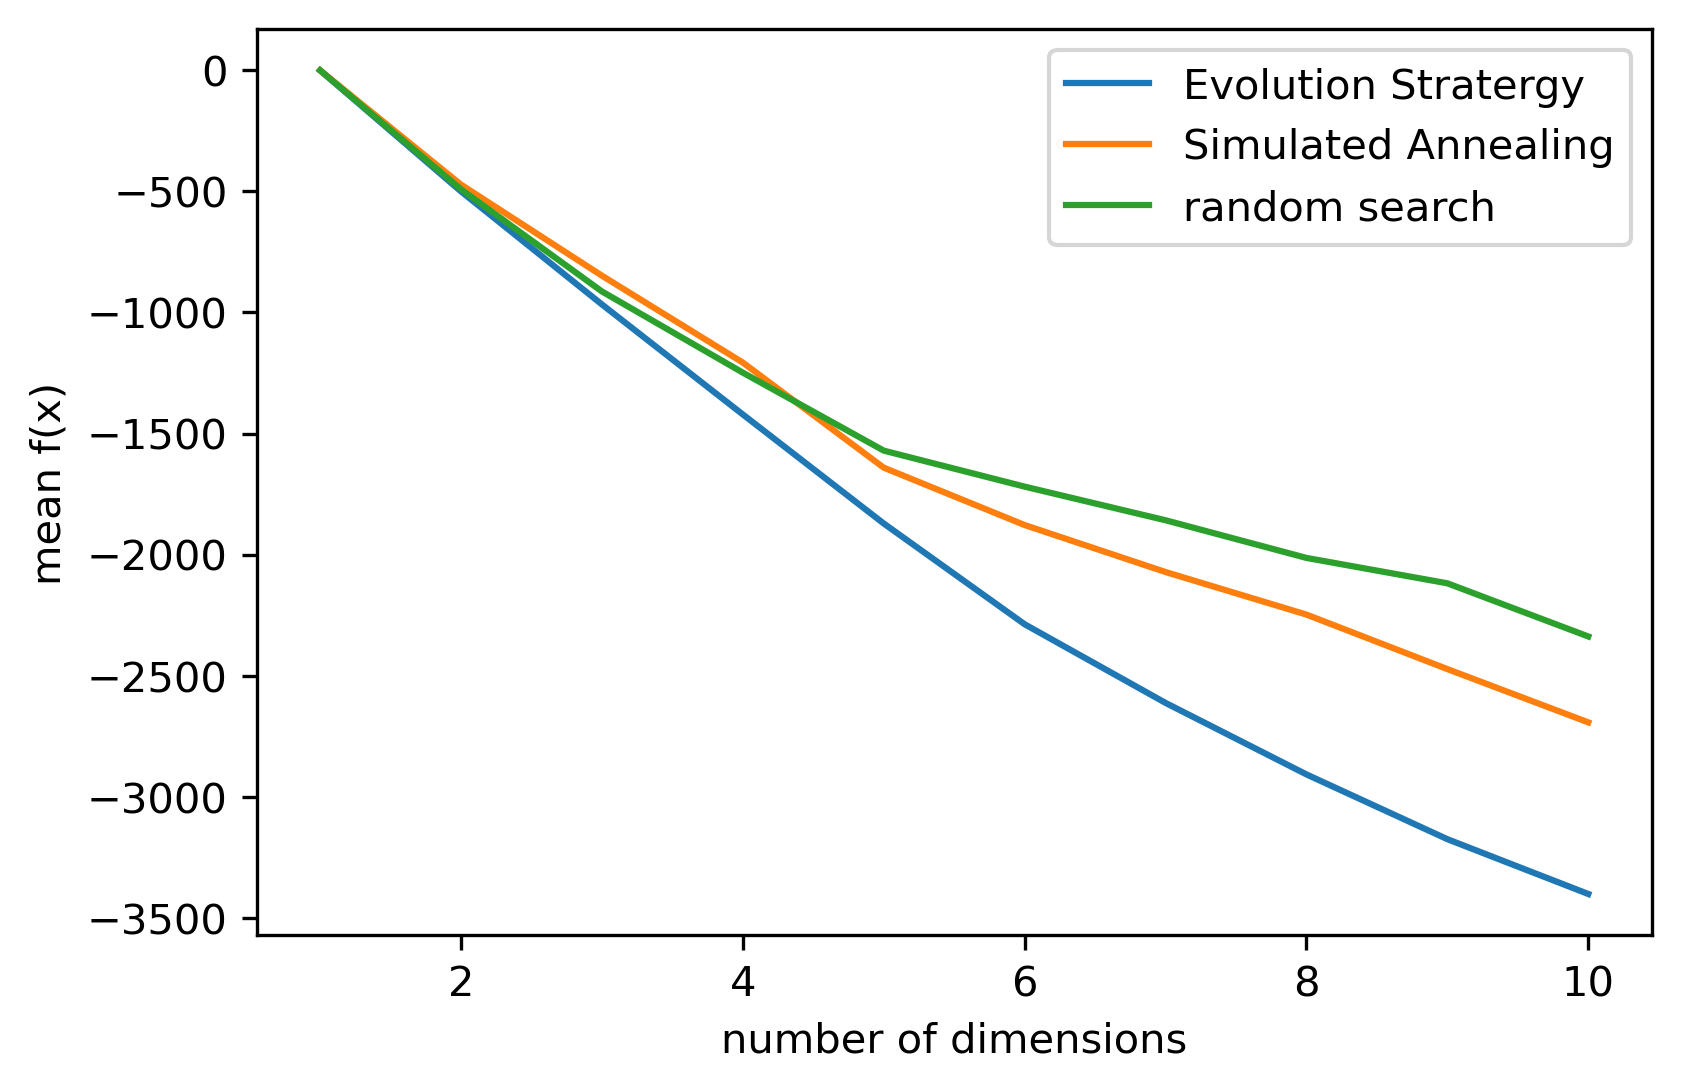

In [29]:
plt.plot(ES_results_df["x_length"], ES_results_df["mean_performance_final"], label="Evolution Stratergy")
plt.plot(SA_results_df["x_length"], SA_results_df["mean_performance_final"], label="Simulated Annealing")
#plt.plot(grid_search_results[:, 0], grid_search_results[:, 1], label="grid search")
plt.plot(random_search_results[:, 0], random_search_results[:, 1], label="random search")
plt.legend()
plt
plt.xlabel("number of dimensions")
plt.ylabel("mean f(x)")
plt.savefig("./Figures/DIM.png")

# Rosenbrock's function

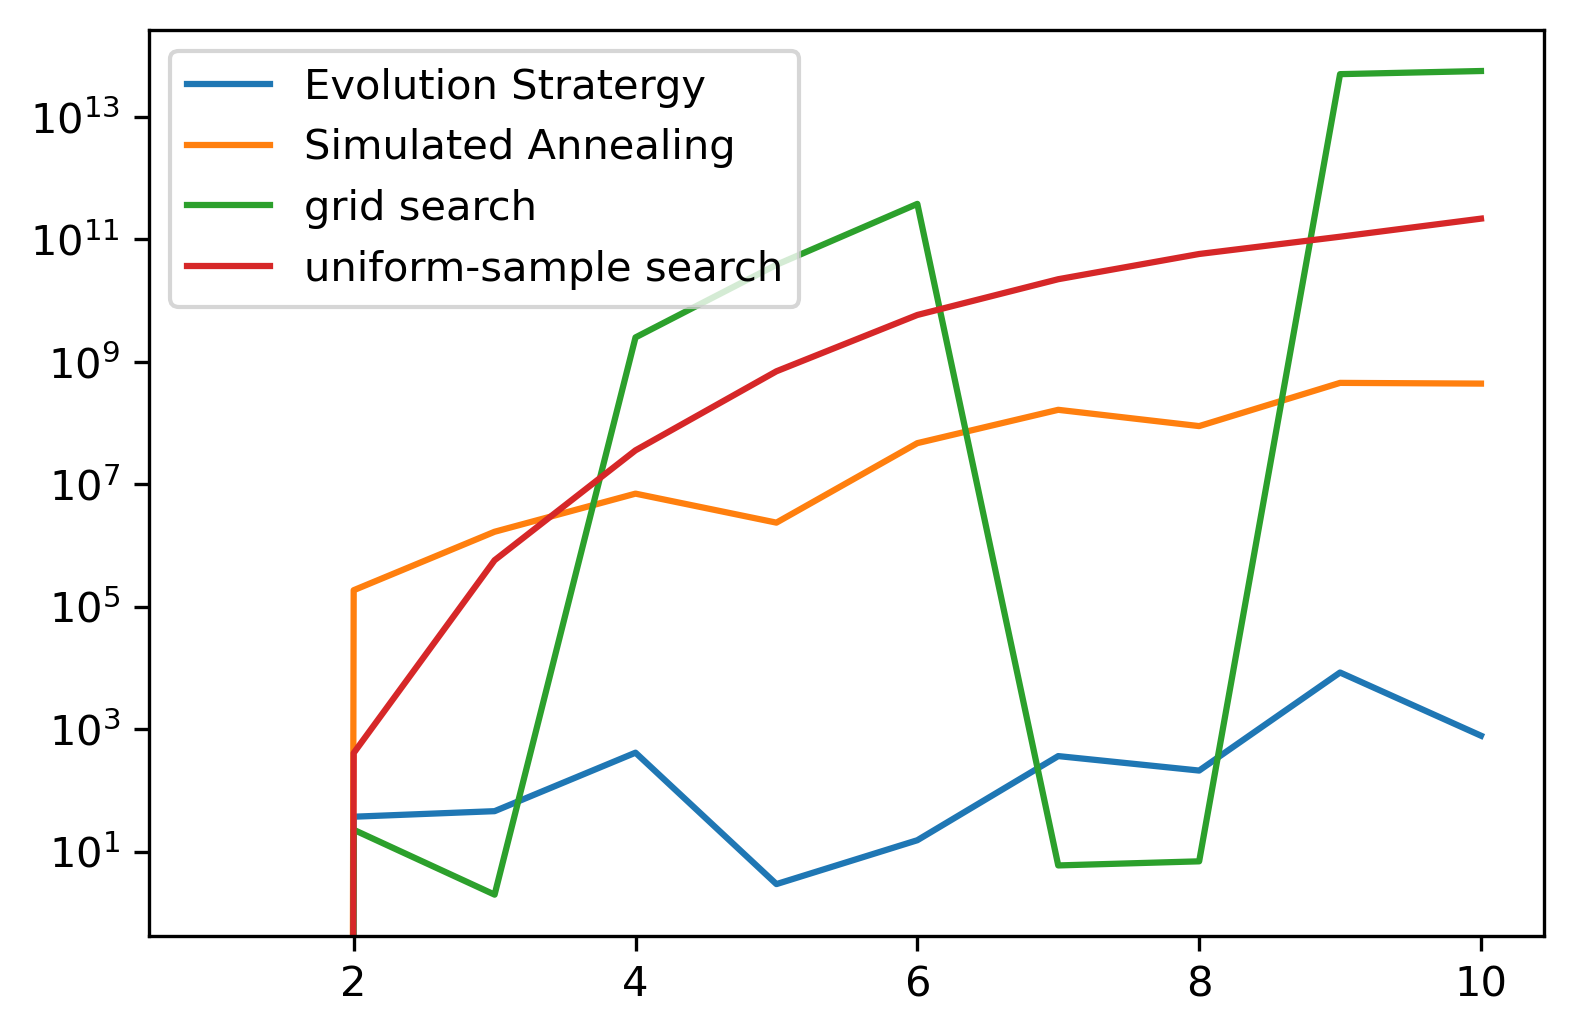

In [49]:
plt.plot(ES_results_df_ROS["x_length"], ES_results_df_ROS["mean_performance_final"], label="Evolution Stratergy")
plt.plot(SA_results_df_ROS["x_length"], SA_results_df_ROS["mean_performance_final"], label="Simulated Annealing")
plt.plot(grid_search_results_ROS[:, 0], grid_search_results_ROS[:, 1], label="grid search")
plt.plot(random_search_results_ROS[:, 0], random_search_results_ROS[:, 1], label="uniform-sample search")
plt.legend()
plt.yscale("log")